<h2>Covid-19 seurantaa</h2>

Ajamalla koodit saat tuoreimman tilanteen.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates

plt.style.use('ggplot')

# Käytän näitä akselien tuunaamiseen
months = mdates.MonthLocator()
months_fmt = mdates.DateFormatter('%b')

In [2]:
# Datan nouto
df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv', usecols = [1, 2, 3, 5, 8, 11, 14, 16, 44])

#Päivämäärät indeksiin
df.index = pd.to_datetime(df['date'], format = '%Y-%m-%d')
df.index.name = ''
df.head()

,continent,location,date,new_cases,new_deaths,new_cases_per_million,new_deaths_per_million,reproduction_rate,population
,,,,,,,,,
2020-02-24,Asia,Afghanistan,2020-02-24,1.0,NaN,0.026,NaN,NaN,38928341.0
2020-02-25,Asia,Afghanistan,2020-02-25,0.0,NaN,0.000,NaN,NaN,38928341.0
2020-02-26,Asia,Afghanistan,2020-02-26,0.0,NaN,0.000,NaN,NaN,38928341.0
2020-02-27,Asia,Afghanistan,2020-02-27,0.0,NaN,0.000,NaN,NaN,38928341.0
2020-02-28,Asia,Afghanistan,2020-02-28,0.0,NaN,0.000,NaN,NaN,38928341.0


In [3]:
# Jos haluat katsoa muiden maiden tietoja, niin kirjoita maiden nimet oikein:
np.sort(df['location'].unique())

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Costa Rica', "Cote d'Ivoire", 'Croatia',
       'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Europe', 'European Union', 'Faeroe

In [4]:
# Funktio piirtää maan tartuntojen ja kuolemien ilmaantuvuuden (14 päivän keskiarvo 100000 asukasta kohden)
# Lisäksi funktio tulostaa viimeisimpien päivien tartunnat, kuolemat ja R-luvut (reproduction_rate)
def ilmaantuvuus(maa):
    
    df_maa = df[df['location'] == maa][['new_cases', 'new_deaths', 'population', 'reproduction_rate']]
    
    # Tulostaa 7 viimeisimmän päivän tartunnat, kuolemat ja R-luvut
    # Alle 1 suuruinen R-luku (reproduction_rate) yleensä ennakoi tartuntojen vähenemistä
    print(df_maa.tail(7))
    
    # Tartuntojen ilmaantuvuus
    ax1 = (df_maa['new_cases'].rolling(14).sum() / (df_maa['population'] / 100000)).plot(figsize = (15, 8), color = 'C0')
    plt.ylabel('Tartuntojen ilmaantuvuus', color = 'C0', fontsize = 14)
       
    # Kuolemien ilmaantuvuus
    ax2 = ax1.twinx()
    (df_maa['new_deaths'].rolling(14).sum() / (df_maa['population'] / 100000)).plot(color = 'black')
    plt.ylabel('Kuolemien ilmaantuvuus', color = 'black', fontsize = 14)
    
    plt.title(maa)
    
    # Kuukausien nimet x-akselille
    ax1.xaxis.set_major_locator(months)
    ax1.xaxis.set_major_formatter(months_fmt)
          

# Funktio piirtää neljän maan tartuntojen ilmaantuvuudet samaan kaavioon
def vertaa4(maa1, maa2, maa3, maa4):
    
    df_maa1 = df[df['location'] == maa1][['new_cases', 'population']]
    df_maa2 = df[df['location'] == maa2][['new_cases', 'population']]
    df_maa3 = df[df['location'] == maa3][['new_cases', 'population']]
    df_maa4 = df[df['location'] == maa4][['new_cases', 'population']]
             
    ax = (df_maa1['new_cases'].rolling(14).sum() / (df_maa1['population'] / 100000)).plot(label = maa1, figsize = (15, 8))
    (df_maa2['new_cases'].rolling(14).sum() / (df_maa2['population'] / 100000)).plot(label = maa2)
    (df_maa3['new_cases'].rolling(14).sum() / (df_maa3['population'] / 100000)).plot(label = maa3)
    (df_maa4['new_cases'].rolling(14).sum() / (df_maa4['population'] / 100000)).plot(label = maa4)
    
    plt.ylabel('Ilmaantuvuus')
    plt.legend()
    plt.title(maa1 + ' , ' +  maa2 + ' , ' + maa3 + ' & ' + maa4)
        
    # Kuukausien nimet x-akselille
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(months_fmt)

            new_cases  new_deaths  population  reproduction_rate
                                                                
2021-05-14      154.0         1.0   5540718.0               0.93
2021-05-15      192.0         0.0   5540718.0               0.94
2021-05-16      227.0         0.0   5540718.0               0.94
2021-05-17      144.0         2.0   5540718.0               0.94
2021-05-18      149.0        -4.0   5540718.0               0.94
2021-05-19      289.0         0.0   5540718.0                NaN
2021-05-20      259.0         0.0   5540718.0                NaN


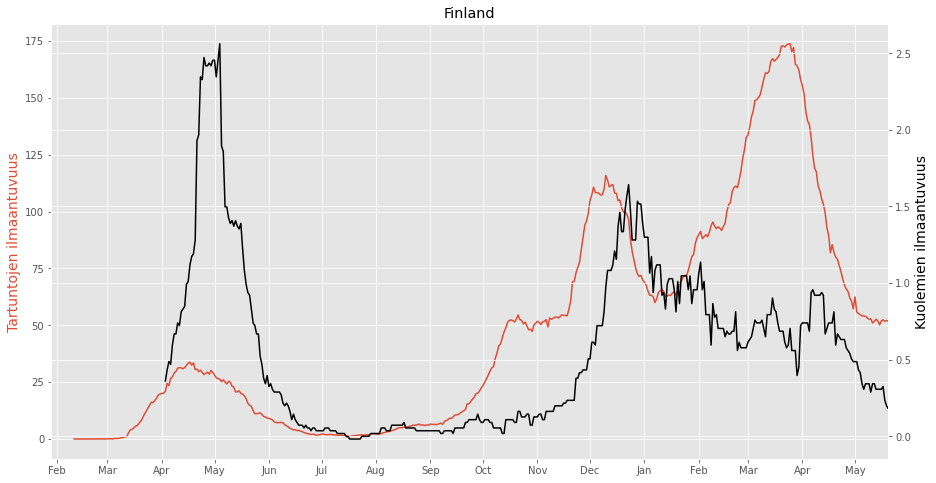

In [5]:
ilmaantuvuus('Finland')

            new_cases  new_deaths  population  reproduction_rate
                                                                
2021-05-14     9192.0         8.0  10099270.0               0.99
2021-05-15        0.0         0.0  10099270.0               0.98
2021-05-16        0.0         0.0  10099270.0               0.97
2021-05-17        0.0         0.0  10099270.0               0.96
2021-05-18    10017.0        26.0  10099270.0               0.94
2021-05-19     4619.0        48.0  10099270.0                NaN
2021-05-20     3411.0         2.0  10099270.0                NaN


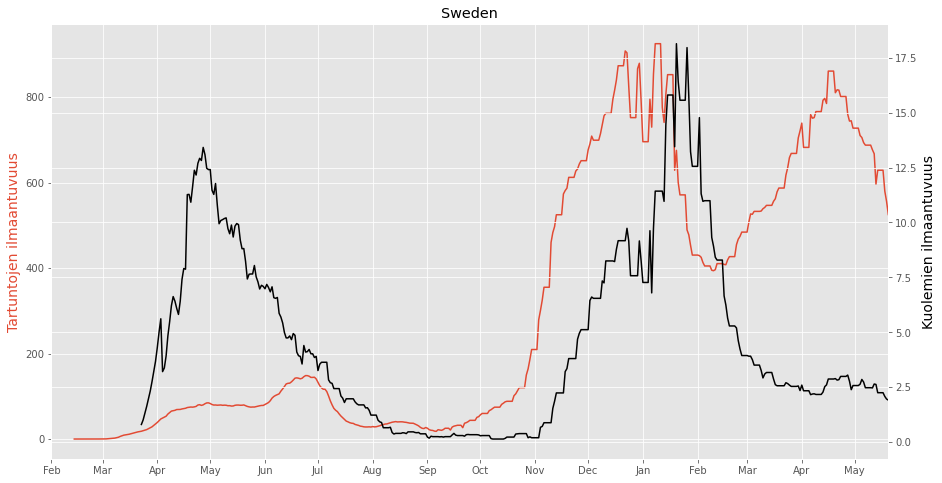

In [6]:
ilmaantuvuus('Sweden')

            new_cases  new_deaths  population  reproduction_rate
                                                                
2021-05-14    10377.0       177.0  83783945.0               0.75
2021-05-15     7370.0        70.0  83783945.0               0.75
2021-05-16     7067.0        66.0  83783945.0               0.76
2021-05-17     5381.0       220.0  83783945.0               0.75
2021-05-18     7576.0       285.0  83783945.0               0.73
2021-05-19    11881.0       237.0  83783945.0                NaN
2021-05-20    10727.0       227.0  83783945.0                NaN


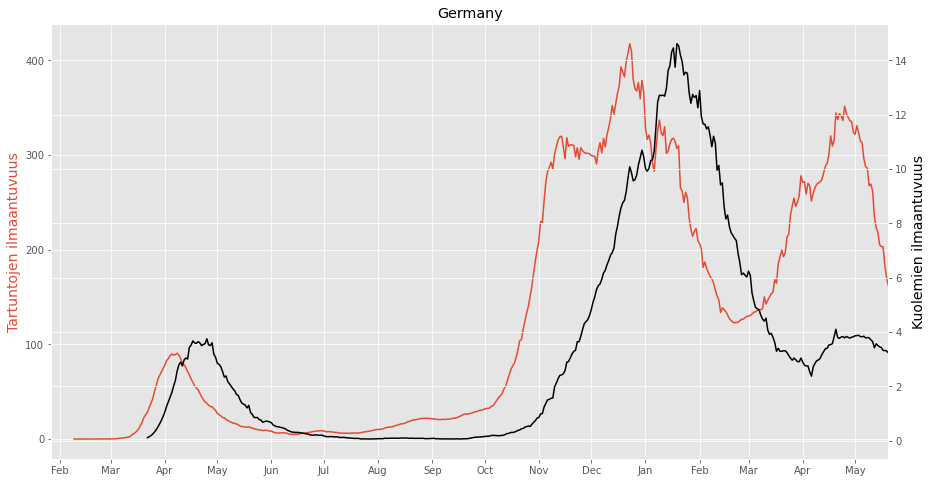

In [7]:
ilmaantuvuus('Germany')

            new_cases  new_deaths  population  reproduction_rate
                                                                
2021-05-14     7043.0       173.0  67564251.0               0.81
2021-05-15    15685.0       112.0  67564251.0               0.81
2021-05-16    13948.0        81.0  67564251.0               0.82
2021-05-17     3351.0       196.0  67564251.0               0.82
2021-05-18    17223.0       228.0  67564251.0               0.82
2021-05-19    19057.0       141.0  67564251.0                NaN
2021-05-20      449.0         1.0  67564251.0                NaN


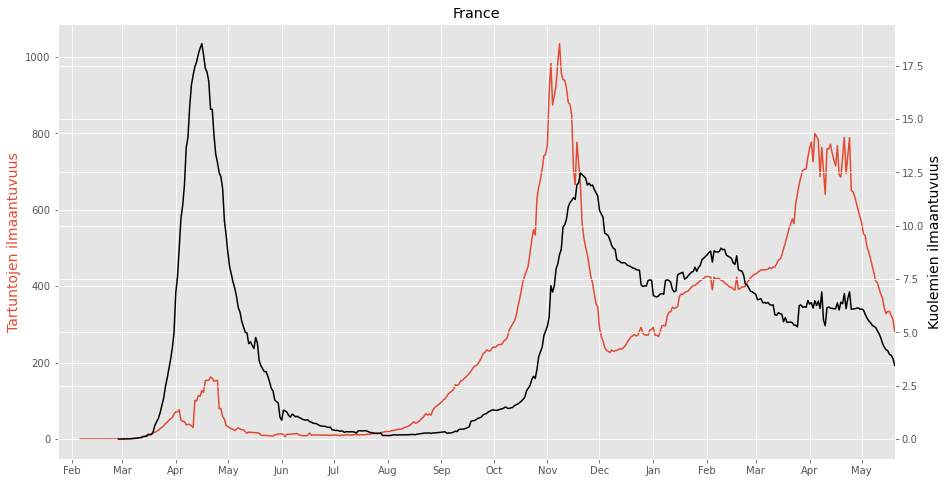

In [8]:
ilmaantuvuus('France')

            new_cases  new_deaths  population  reproduction_rate
                                                                
2021-05-14     6347.0        58.0  46754783.0               0.87
2021-05-15        0.0         0.0  46754783.0               0.87
2021-05-16        0.0         0.0  46754783.0               0.87
2021-05-17    11061.0        93.0  46754783.0               0.86
2021-05-18     3988.0        70.0  46754783.0               0.86
2021-05-19     6080.0        66.0  46754783.0                NaN
2021-05-20     5733.0        33.0  46754783.0                NaN


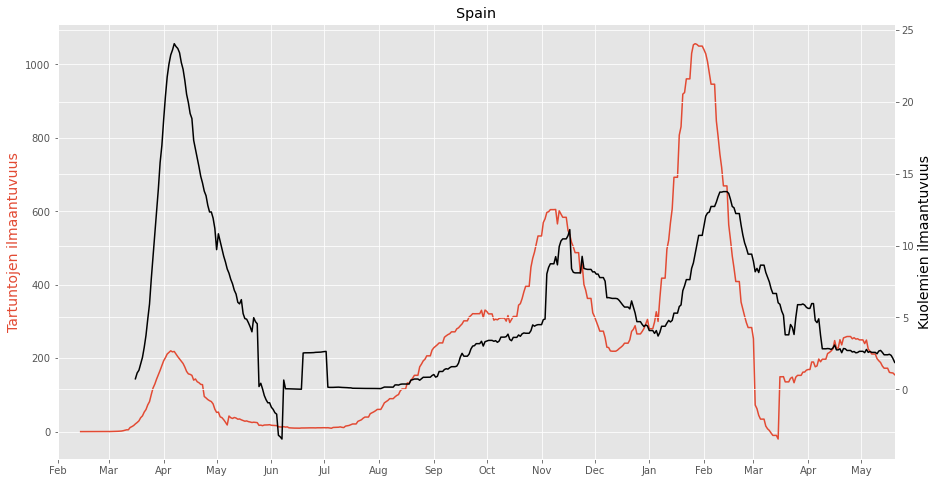

In [9]:
ilmaantuvuus('Spain')

            new_cases  new_deaths  population  reproduction_rate
                                                                
2021-05-14     2198.0        18.0  67886004.0               0.99
2021-05-15     2060.0         7.0  67886004.0               0.99
2021-05-16     1926.0         4.0  67886004.0               0.98
2021-05-17     1993.0         5.0  67886004.0               0.97
2021-05-18    -2362.0         7.0  67886004.0               0.97
2021-05-19     2146.0         3.0  67886004.0                NaN
2021-05-20     2699.0         7.0  67886004.0                NaN


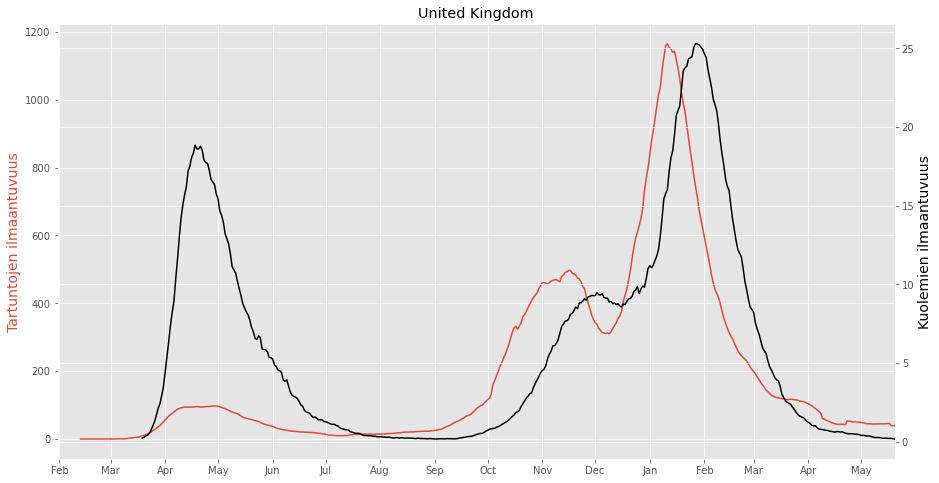

In [10]:
ilmaantuvuus('United Kingdom')

            new_cases  new_deaths    population  reproduction_rate
                                                                  
2021-05-14   326098.0      3890.0  1.380004e+09               0.96
2021-05-15   311170.0      4077.0  1.380004e+09               0.96
2021-05-16   281386.0      4106.0  1.380004e+09               0.95
2021-05-17   263533.0      4329.0  1.380004e+09               0.95
2021-05-18   267334.0      4529.0  1.380004e+09               0.94
2021-05-19   276110.0      3874.0  1.380004e+09                NaN
2021-05-20   259551.0      4209.0  1.380004e+09                NaN


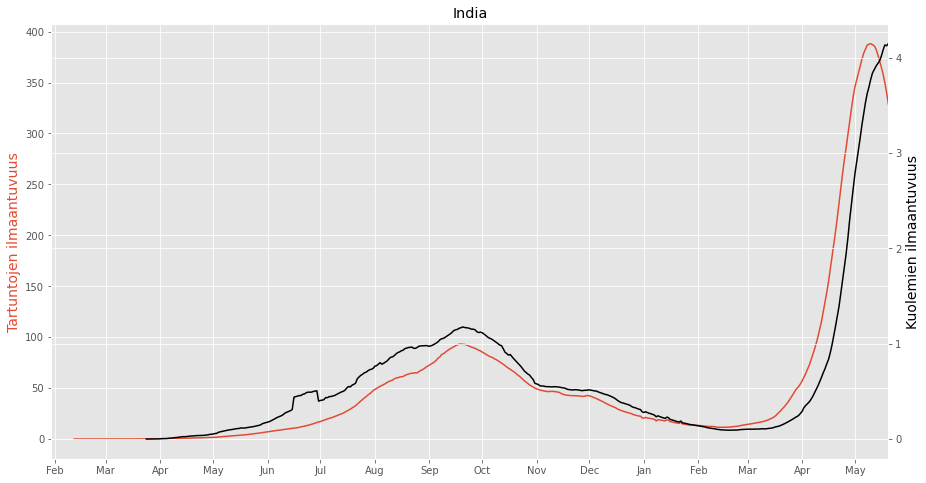

In [11]:
ilmaantuvuus('India')

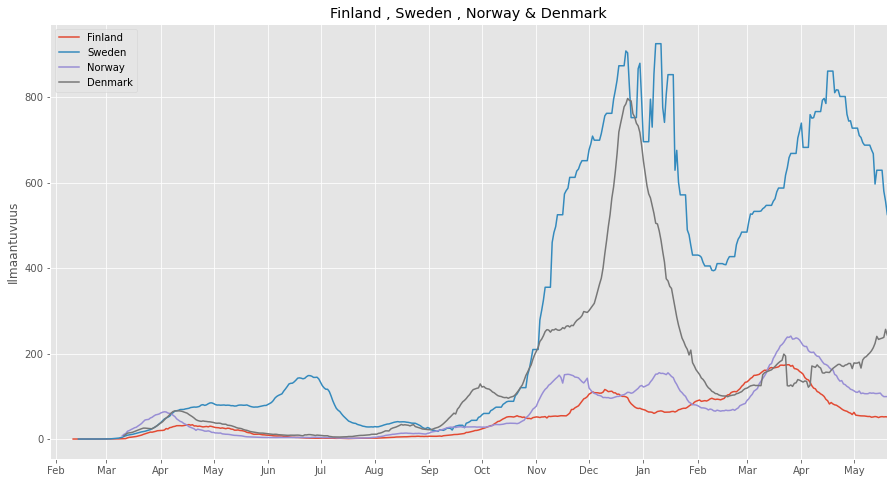

In [12]:
vertaa4('Finland', 'Sweden', 'Norway', 'Denmark')

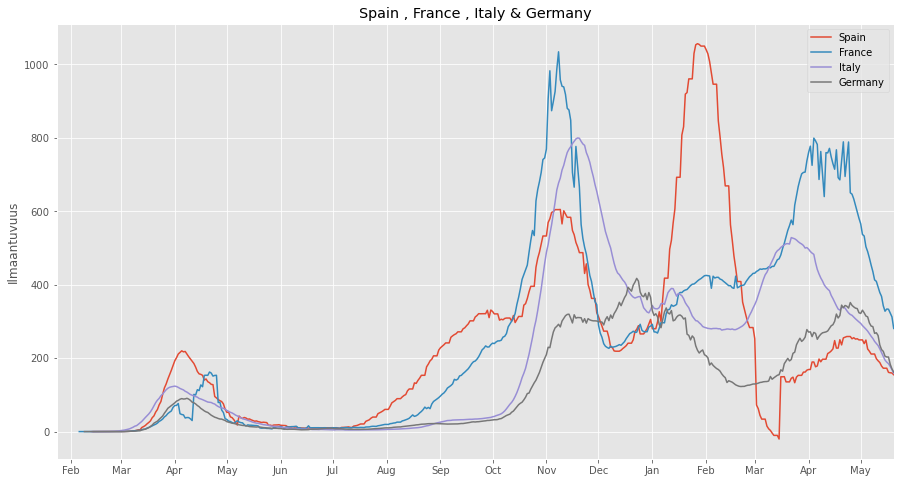

In [13]:
vertaa4('Spain', 'France', 'Italy', 'Germany')